# Product Recommendation 
## Random Forest
  - Random Forest is a powerful and popular machine learning algorithm used for classification and regression tasks. It works by building multiple decision trees and combining their outputs to make a more accurate and stable prediction.

In [5]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
# Dataset
data = pd.DataFrame({
    'age': [18, 25, 30, 22, 40, 35, 50, 28, 45, 33],
    'income_level': ['low', 'medium', 'high', 'low', 'high', 'medium', 'high', 'medium', 'high', 'low'],
    'browsing_time': [5, 15, 30, 8, 25, 20, 35, 18, 27, 10],  
    'clicked_ad': [0, 1, 1, 0, 1, 1, 1, 1, 1, 0]  # 1 = interested, 0 = not interested
})


In [11]:
data

,age,income_level,browsing_time,clicked_ad
0,18,low,5,0
1,25,medium,15,1
2,30,high,30,1
3,22,low,8,0
4,40,high,25,1
5,35,medium,20,1
6,50,high,35,1
7,28,medium,18,1
8,45,high,27,1
9,33,low,10,0


In [17]:
# Converted Categories Into numbers
data['income_level'] = data['income_level'].map({'low':0,'medium':1,'high':2})

In [19]:
X = data[['age','income_level','browsing_time']]
y = data['clicked_ad']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10, random_state=42)

In [25]:
y_pred = model.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(accuracy)


1.0


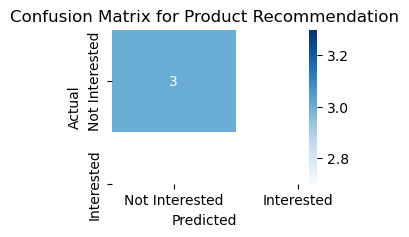

In [34]:
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Interested', 'Interested'], yticklabels=['Not Interested', 'Interested'])
plt.title('Confusion Matrix for Product Recommendation')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [48]:
# new data
new_data = pd.DataFrame({
    'age': [30, 40, 50],
    'income_level': [1,2,0],
    'browsing_time': [15, 25, 30]
})

new_predictions = model.predict(new_data)
print(f"Predictions for unseen data: {new_predictions}")

Predictions for unseen data: [1 1 1]
